In [3]:
import pandas as pd
import numpy as np
import matplotlib

# show all columns of a pandas dataframe
pd.set_option('display.max_columns', None)

### Import & clean the data

The dataset shows Airbnb activity in Seattle, has been provided by Airbnb and can be downloaded on Kaggle: <br> 
https://www.kaggle.com/datasets/airbnb/seattle/data <br>

The dataset contains the following:
- Calendar, including listing id and the price and availability for that day (calender.csv)
- Listings, including full descriptions and average review score (listings.csv)
- Reviews, including unique id for each reviewer and detailed comments (reviews.csv)

In [4]:
# Import the datasets
df_cal = pd.read_csv("data/calendar.csv")
df_list = pd.read_csv("data/listings.csv")
df_rev = pd.read_csv("data/reviews.csv")

---
Check & modify the dataframe with the calendar

In [5]:
df_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [7]:
# change column date from str to datetime
df_cal['date'] = pd.to_datetime(df_cal.date)

# change column available from string to boolean
df_cal['available'] = df_cal['available'].apply(lambda x: True if x == 't' else False)

# calculate a new column without currency sign
df_cal['price_usd'] = df_cal['price'].apply(lambda x: x[1:] if isinstance(x, str) else x)

# remove thousand separator and convert column to float
df_cal['price_usd'] = df_cal['price_usd'].apply(lambda x: x.replace(',', '') if isinstance(x, str) else x).astype(float)

# drop column price
df_cal = df_cal.drop(columns='price')

In [8]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  bool          
 3   price_usd   934542 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 33.2 MB


In [9]:
df_cal.describe()

,listing_id,date,price_usd
count,1.393570e+06,1393570,934542.000000
mean,5.550111e+06,2016-07-04 00:00:00.000000256,137.944859
min,3.335000e+03,2016-01-04 00:00:00,10.000000
25%,3.258213e+06,2016-04-04 00:00:00,75.000000
50%,6.118244e+06,2016-07-04 00:00:00,109.000000
75%,8.035212e+06,2016-10-03 00:00:00,160.000000
max,1.034016e+07,2017-01-02 00:00:00,1650.000000
std,2.962274e+06,NaN,105.062870


---
Check & modify the dataframe with the listings

In [10]:
df_list.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [11]:
# change some columns from str to boolean
col_bool = ['host_is_superhost',
            'host_has_profile_pic',
            'host_identity_verified',
            'is_location_exact',
            'has_availability',
            'requires_license',
            'instant_bookable',
            'require_guest_profile_picture',
            'require_guest_phone_verification']

for col in col_bool:
    df_list[col] = df_list[col].apply(lambda x: True if x == 't' else False)


# change column from str to datetime
col_date = ['last_scraped', 'host_since', 'calendar_last_scraped', 'first_review', 'last_review']

for col in col_date:
    df_list[col] = pd.to_datetime(df_list[col])


# replace percentage sign and convert column from str to float
col_perc = ['host_response_rate', 'host_acceptance_rate']

for col in col_perc:
    df_list[col] = df_list[col].apply(lambda x: x[:-1] if isinstance(x, str) else x).astype(float)


# calculate a new column without currency sign
col_curr = ['price','extra_people', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee']

for col in col_curr:
    df_list[col + '_usd'] = df_list[col].apply(lambda x: x[1:] if isinstance(x, str) else x)

# generate numeric values for the column host_response_time
resp_dict = {
    'within an hour': 1,
    'within a few hours' : .75,
    'within a day' : .5,
    'a few days or more' : .25
}

df_list['host_response_time_val'] = df_list['host_response_time'].apply(lambda x: resp_dict[x] if isinstance(x, str) else x).astype(float)


# Prepare and extend the column amenities
df_list['amenities'] = df_list['amenities'].apply(lambda x: x.replace('"', '').replace('{', '').replace('}', '').replace('/', '_').replace('(s)', ''))
df_list['amenities'] = df_list['amenities'].apply(lambda x: x.lower())
df_list['amenities'] = df_list['amenities'].apply(lambda x: x.replace(' ', '_'))

temp_df = df_list['amenities'].str.get_dummies(sep=',')

new_cols = []
for entry in temp_df.columns:
    new_cols.append('amenity_' + entry)

temp_df.columns = new_cols

df_list = pd.concat([df_list, temp_df], axis = 1) 

In [12]:
# drop columns that are not further considered or needed
col_drop = ['thumbnail_url',
            'medium_url',
            'xl_picture_url',
            'host_location',
            'host_verifications',
            'state',
            'market',
            'smart_location',
            'country_code',
            'country',
            'jurisdiction_names',
            'price',
            'extra_people',
            'weekly_price',
            'monthly_price',
            'security_deposit',
            'cleaning_fee',
            'host_response_time',
            'amenities']

df_list = df_list.drop(columns=col_drop)

In [13]:
df_list.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,picture_url,host_id,host_url,host_name,host_since,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,guests_included,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_usd,extra_people_usd,weekly_price_usd,monthly_price_usd,security_deposit_usd,cleaning_fee_usd,host_response_time_val,amenity_24-hour_check-in,amenity_air_conditioning,amenity_breakfast,amenity_buzzer_wireless_intercom,amenity_cable_tv,amenity_carbon_monoxide_detector,amenity_cat,amenity_dog,amenity_doorman,amenity_dryer,amenity_elevator_in_building,amenity_essentials,amenity_family_kid_friendly,amenity_fire_extinguisher,amenity_first_aid_kit,amenity_free_parking_on_premises,amenity_gym,amenity_hair_dryer,amenity_hangers,amenity_heating,amenity_hot_tub,amenity_indoor_fireplace,amenity_internet,amenity_iron,amenity_kitchen,amenity_laptop_friendly_workspace,amenity_lock_on_bedroom_door,amenity_other_pet,amenity_pets_allowed,amenity_pets_live_on_this_property,amenity_pool,amenity_safety_card,amenity_shampoo,amenity_smoke_detector,amenity_smoking_allowed,amenity_suitable_for_events,amenity_tv,amenity_washer,amenity_washer___dryer,amenity_wheelchair_accessible,amenity_wireless_internet
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"I am an artist, interior designer, and run a s...",96.0,100.0,False,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,True,True,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,98119,47.636289,-122.371025,True,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,2,1,365,4 weeks ago,True,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,False,NaN,False,moderate,False,False,2,4.07,85.00,5.00,NaN,NaN,NaN,NaN,0.75,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,Living east coast/left coast/overseas. Time i...,98.0,100.0,True,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,True,True,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,98119,47.639123,-122.365666,True,Apartment,Entire 

In [14]:
df_cal[(df_cal['listing_id'] == 3308979) & (df_cal['available'] == True)]

,listing_id,date,available,price_usd
730,3308979,2016-01-04,True,975.0
769,3308979,2016-02-12,True,750.0
770,3308979,2016-02-13,True,750.0
771,3308979,2016-02-14,True,975.0
772,3308979,2016-02-15,True,975.0
...,...,...,...,...
1090,3308979,2016-12-29,True,1650.0
1091,3308979,2016-12-30,True,1650.0
1092,3308979,2016-12-31,True,1650.0
1093,3308979,2017-01-01,True,975.0


array([[<Axes: title={'center': 'available'}>,
        <Axes: title={'center': 'price_usd'}>]], dtype=object)

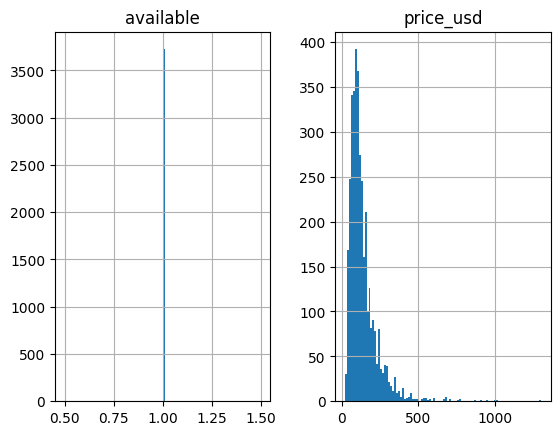

In [19]:
df_cal[df_cal['available'] == True].groupby('listing_id').mean('price_usd').hist(bins = 100)

In [16]:
df_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Columns: 121 entries, id to amenity_wireless_internet
dtypes: bool(9), datetime64[ns](5), float64(20), int64(54), object(33)
memory usage: 3.3+ MB


---

In [17]:
df_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
